# 1 - Lendo nomes com json

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('figure', figsize=(20, 10))

Será utilizada a API do IBGE de nomes mais comuns

## Breve análise nomes femininos

In [2]:
ranking_nomes_f = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f')
ranking_nomes_f.head()

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F


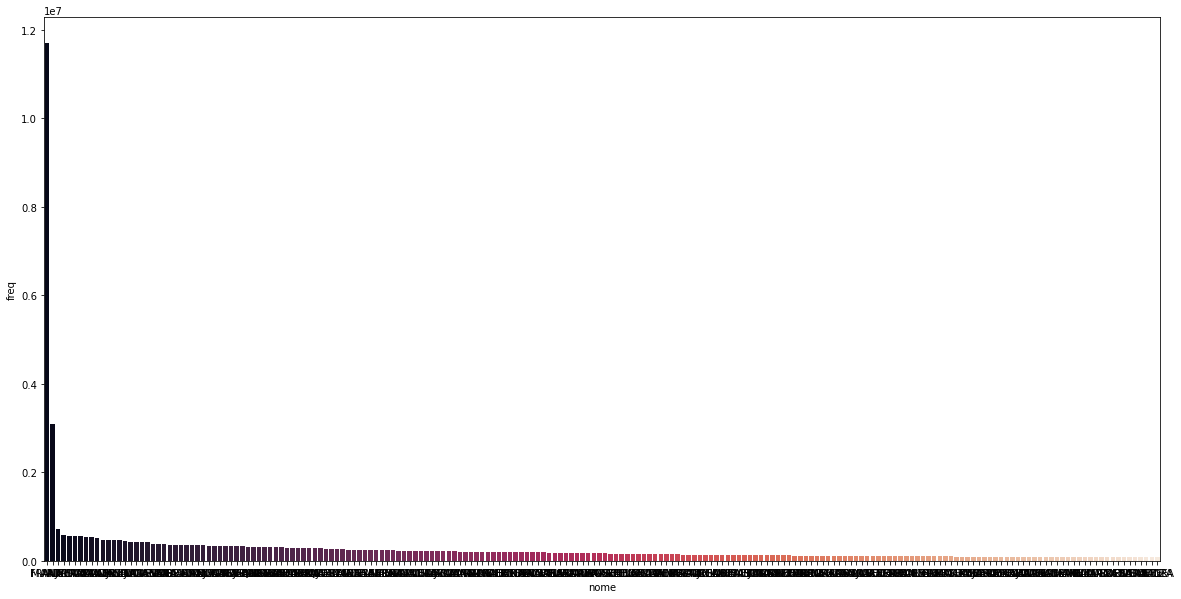

In [3]:
sns.barplot(x='nome', y='freq', data=ranking_nomes_f, palette='rocket')

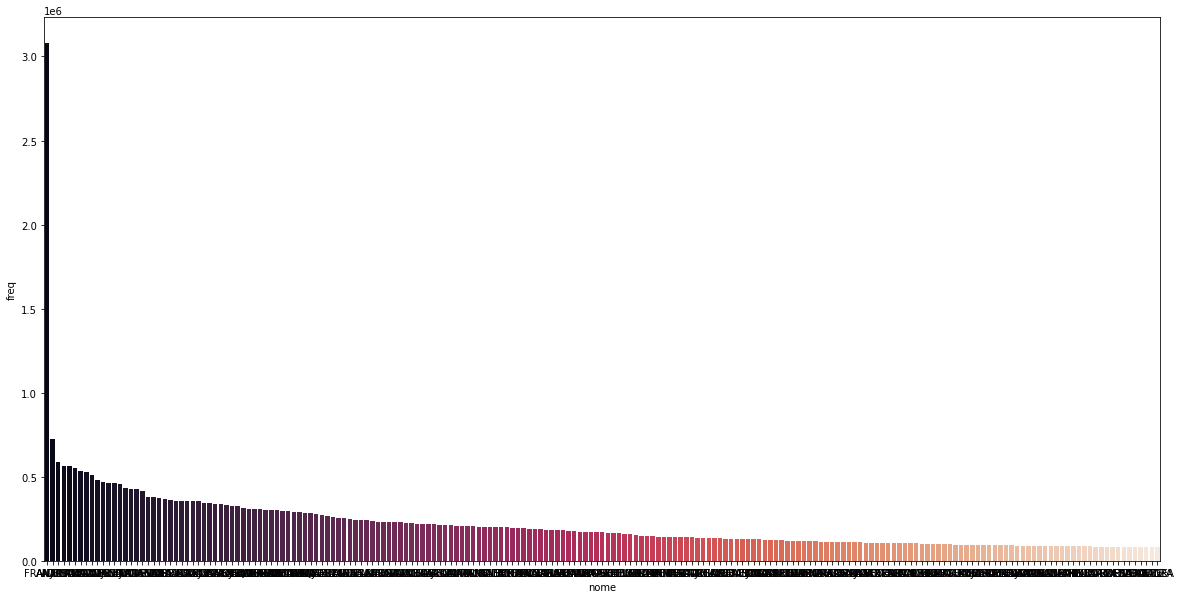

In [4]:
sns.barplot(x='nome', y='freq', data=ranking_nomes_f.query('rank > 1'), palette='rocket')

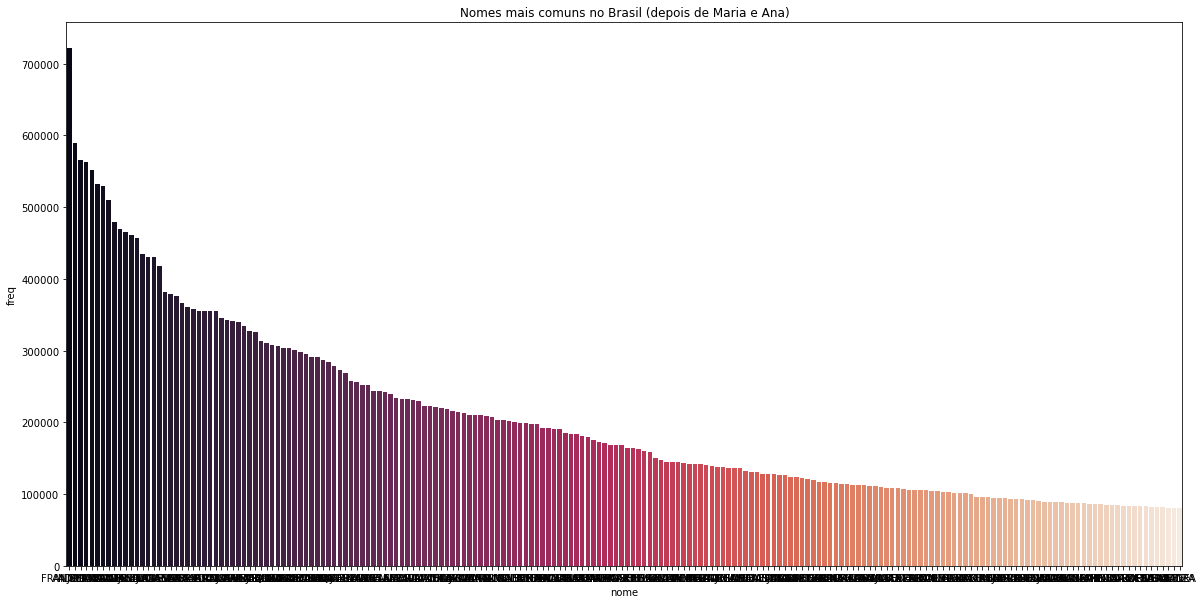

In [5]:
plt.title('Nomes mais comuns no Brasil (depois de Maria e Ana)')
sns.barplot(x='nome', y='freq', data=ranking_nomes_f.query('rank > 2'), palette='rocket')

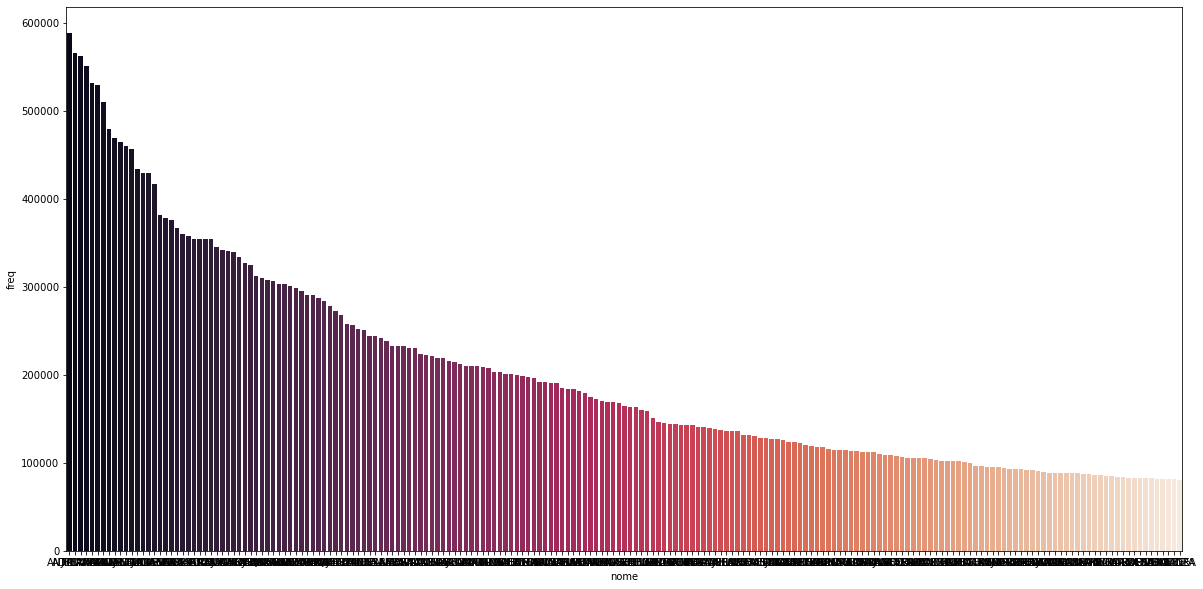

In [6]:
sns.barplot(x='nome', y='freq', data=ranking_nomes_f.query('rank > 3'), palette='rocket')

In [7]:
ranking_nomes_f.freq.describe()

count    2.000000e+02
mean     2.766947e+05
std      8.457683e+05
min      8.012800e+04
25%      1.078322e+05
50%      1.685670e+05
75%      2.740530e+05
max      1.169474e+07
Name: freq, dtype: float64

In [8]:
tres_primeiros_f = ranking_nomes_f.query('rank <= 3')
total_tpf = tres_primeiros_f.freq.sum()
total_outros_f = ranking_nomes_f.query('rank > 3').freq.sum()

In [9]:
tres_primeiros_f.head()

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F


In [10]:
totais_f = pd.DataFrame({
  'nomes': ['Maria, Ana e Francisca', 'Outros'],
  'freq': [total_tpf, total_outros_f]
});
totais_f

,nomes,freq
0,"Maria, Ana e Francisca",15496104
1,Outros,39842833


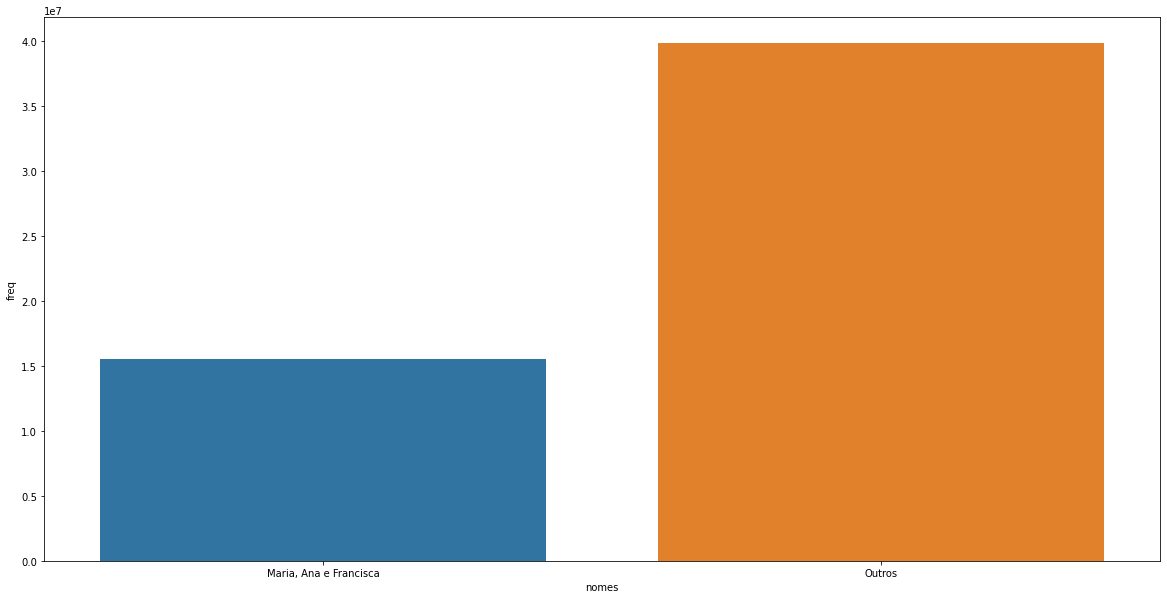

In [11]:
sns.barplot(x= 'nomes', y= 'freq', data= totais_f)

## Breve análise nomes masculinos

In [12]:
ranking_nomes_m = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m')
ranking_nomes_m.head()

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M


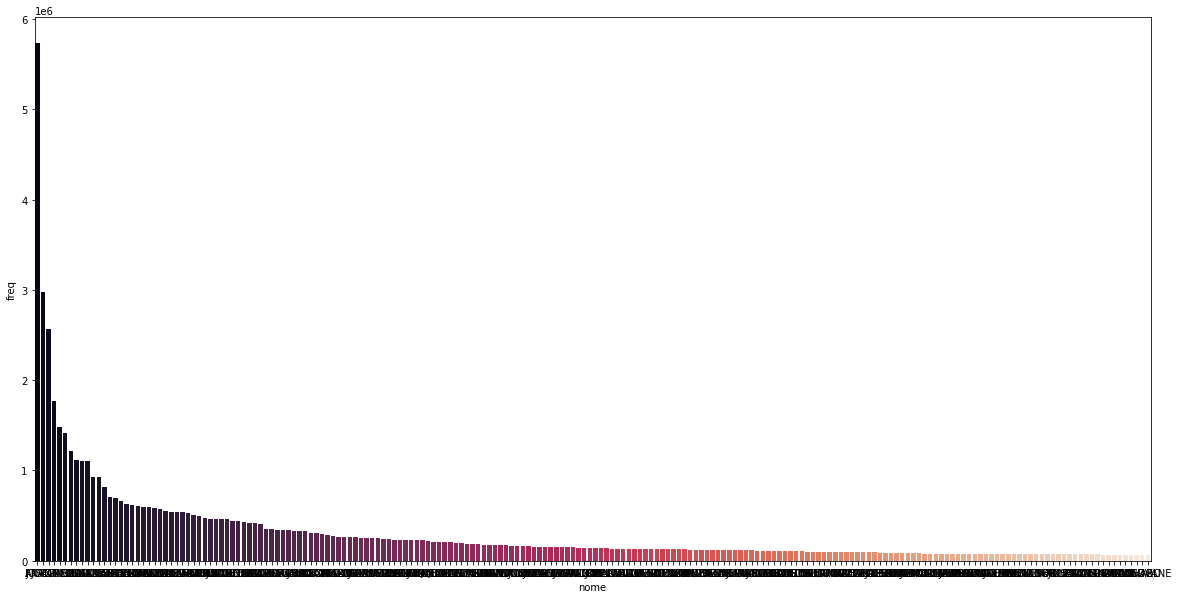

In [13]:
sns.barplot(x='nome', y='freq', data=ranking_nomes_m, palette='rocket')

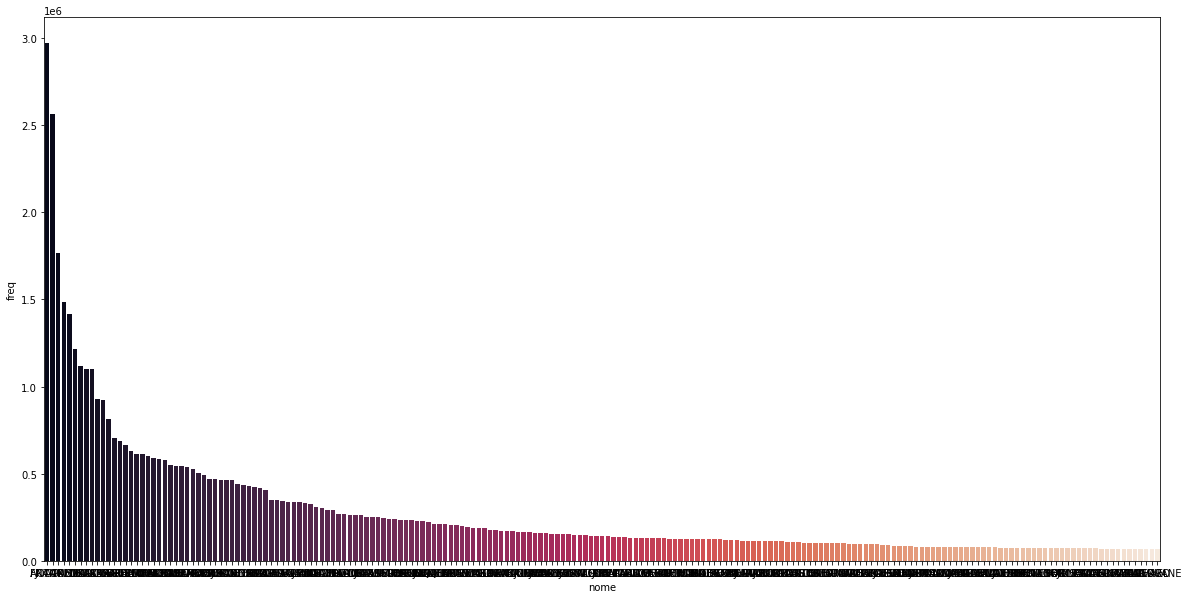

In [14]:
sns.barplot(x='nome', y='freq', data=ranking_nomes_m.query('rank > 1'), palette='rocket')

In [15]:
ranking_nomes_m.freq.describe()

count    2.000000e+02
mean     3.045873e+05
std      5.346521e+05
min      6.543500e+04
25%      9.357650e+04
50%      1.439910e+05
75%      3.041095e+05
max      5.732508e+06
Name: freq, dtype: float64

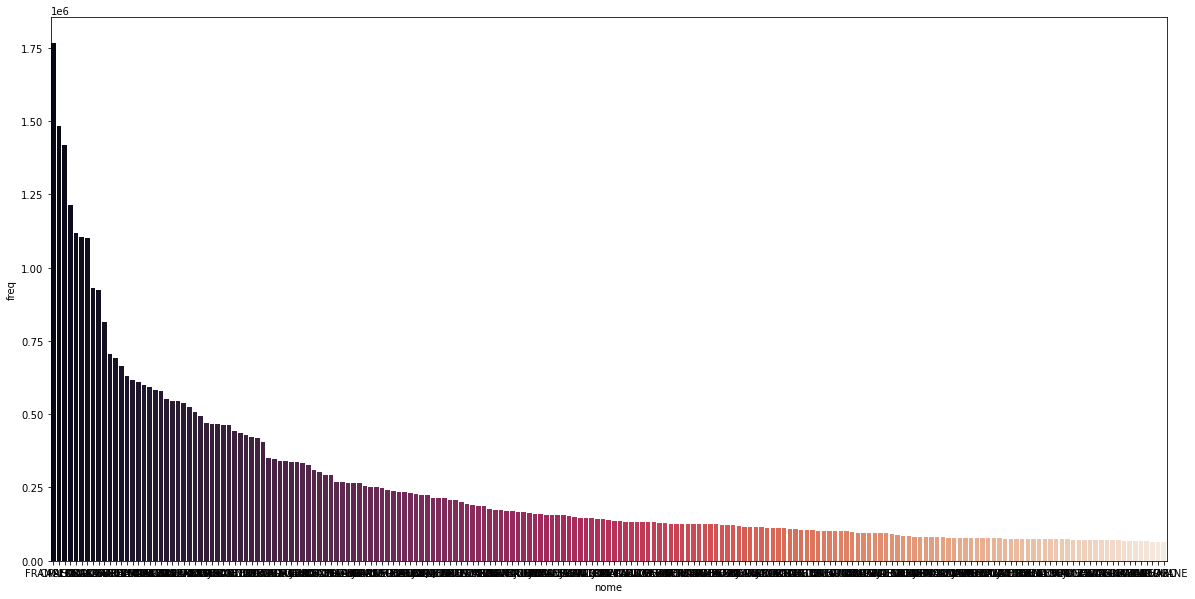

In [16]:
sns.barplot(x='nome', y='freq', data=ranking_nomes_m.query('rank > 3'), palette='rocket')

In [17]:
tres_primeiros_m = ranking_nomes_m.query('rank <= 3')
total_tpm = tres_primeiros_m.freq.sum()
total_outros_m = ranking_nomes_m.query('rank > 3').freq.sum()

In [18]:
tres_primeiros_m

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M


In [19]:
totais_m = pd.DataFrame({
  'nomes': ['José, João e Antônio', 'Outros'],
  'freq': [total_tpm, total_outros_m]
});
totais_m

,nomes,freq
0,"José, João e Antônio",11271937
1,Outros,49645526


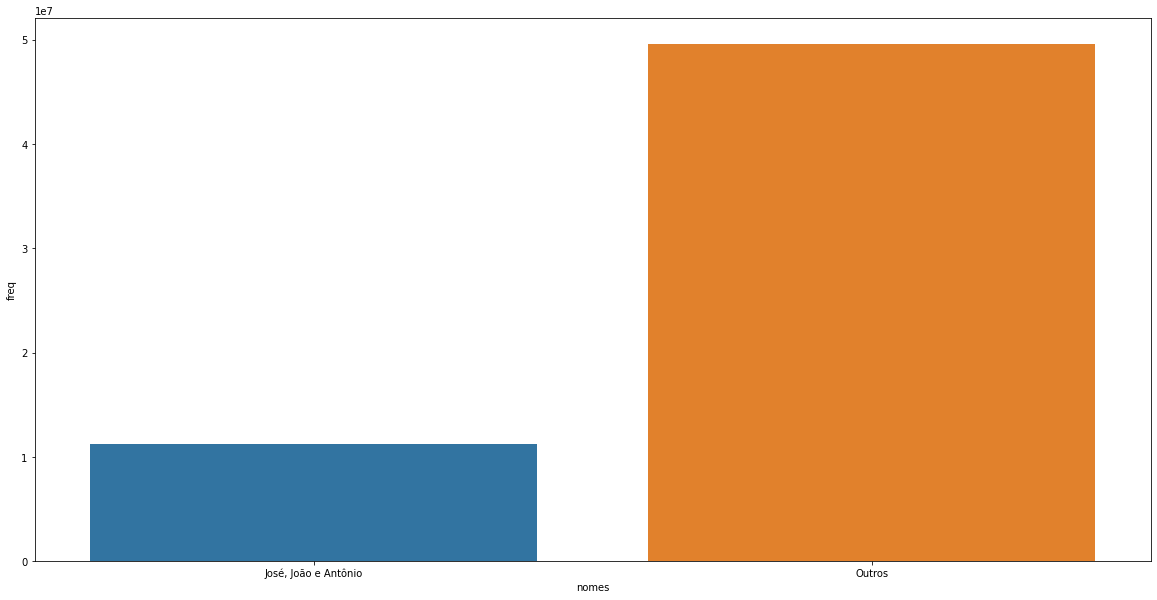

In [20]:
sns.barplot(x= 'nomes', y= 'freq', data= totais_m)

## Manipulando dados dos nomes

In [21]:
ranking_nomes = pd.concat([ranking_nomes_f, ranking_nomes_m])
ranking_nomes.sort_values(by= 'freq', inplace= True, ascending= False)
ranking_nomes.head(100)

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
0,JOSE,0,5732508,1,M
1,ANA,0,3079729,2,F
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
...,...,...,...,...,...
44,RAIMUNDA,0,295061,45,F
51,ROGERIO,0,292635,52,M
52,SAMUEL,0,291057,53,M
45,ANDREIA,0,290970,46,F


In [22]:
ranking_nomes.reset_index(drop = True, inplace = True)
ranking_nomes.head(10)

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,JOSE,0,5732508,1,M
2,ANA,0,3079729,2,F
3,JOAO,0,2971935,2,M
4,ANTONIO,0,2567494,3,M
5,FRANCISCO,0,1765197,4,M
6,CARLOS,0,1483121,5,M
7,PAULO,0,1417907,6,M
8,PEDRO,0,1213557,7,M
9,LUCAS,0,1116818,8,M


In [23]:
ranking_nomes.to_json('dados/ranking_nomes.json')

In [24]:
nomes = ranking_nomes.nome.to_frame()
nomes.head(10)

,nome
0,MARIA
1,JOSE
2,ANA
3,JOAO
4,ANTONIO
5,FRANCISCO
6,CARLOS
7,PAULO
8,PEDRO
9,LUCAS


In [25]:
nomes.to_json('dados/nomes.json')

### Incluindo id nos alunos

In [27]:
np.random.seed(123)
nomes['id_aluno'] = np.random.permutation(len(nomes)) + 1
nomes.head()

,nome,id_aluno
0,MARIA,235
1,JOSE,43
2,ANA,304
3,JOAO,156
4,ANTONIO,343


In [29]:
nomes.set_index('id_aluno', inplace = True)
nomes.head()

,nome
id_aluno,
235,MARIA
43,JOSE
304,ANA
156,JOAO
343,ANTONIO


### Incluindo coluna e-mail

In [36]:
dominios = ['@dominio.com.br', '@servicoemail.com']
nomes['email'] = nomes.nome.str.lower() + np.random.choice(dominios)
nomes.sample(10)

,nome,email
id_aluno,,
358,JORGE,jorge@dominio.com.br
118,EDNA,edna@dominio.com.br
156,JOAO,joao@dominio.com.br
201,SAMUEL,samuel@dominio.com.br
290,MURILO,murilo@dominio.com.br
83,SERGIO,sergio@dominio.com.br
364,CLEITON,cleiton@dominio.com.br
52,REBECA,rebeca@dominio.com.br
274,REGINALDO,reginaldo@dominio.com.br


In [63]:
nomes.to_json('dados/nomes.json')

In [64]:
pd.read_json('dados/nomes.json').head(10)

,nome,email
235,MARIA,maria@dominio.com.br
43,JOSE,jose@dominio.com.br
304,ANA,ana@dominio.com.br
156,JOAO,joao@dominio.com.br
343,ANTONIO,antonio@dominio.com.br
310,FRANCISCO,francisco@dominio.com.br
55,CARLOS,carlos@dominio.com.br
288,PAULO,paulo@dominio.com.br
379,PEDRO,pedro@dominio.com.br
92,LUCAS,lucas@dominio.com.br


In [46]:
nomes

,nome,email
id_aluno,,
235,MARIA,maria@dominio.com.br
43,JOSE,jose@dominio.com.br
304,ANA,ana@dominio.com.br
156,JOAO,joao@dominio.com.br
343,ANTONIO,antonio@dominio.com.br
...,...,...
231,WALTER,walter@dominio.com.br
99,ARLINDO,arlindo@dominio.com.br
323,MICHAEL,michael@dominio.com.br


In [69]:
nomes.reset_index(inplace = True)

In [70]:
nomes.to_json('dados/nomes.json', orient = 'records')
pd.read_json('dados/nomes.json').head(10)

,id_aluno,nome,email
0,235,MARIA,maria@dominio.com.br
1,43,JOSE,jose@dominio.com.br
2,304,ANA,ana@dominio.com.br
3,156,JOAO,joao@dominio.com.br
4,343,ANTONIO,antonio@dominio.com.br
5,310,FRANCISCO,francisco@dominio.com.br
6,55,CARLOS,carlos@dominio.com.br
7,288,PAULO,paulo@dominio.com.br
8,379,PEDRO,pedro@dominio.com.br
9,92,LUCAS,lucas@dominio.com.br
